#CNN on CIFAR-10



CIFAR-10 dataset contains 32x32 color images from 10 classes: __airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck__:
<img src="https://github.com/hse-aml/intro-to-dl/blob/master/week3/images/cifar10.jpg?raw=1" style="width:80%">

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras

In [2]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print("Train samples:", x_train.shape, y_train.shape)
print("Test samples:", x_test.shape, y_test.shape)
NUM_CLASSES = 10
cifar10_classes = ["airplane", "automobile", "bird", "cat", "deer", 
                                     "dog", "frog", "horse", "ship", "truck"]

x_mean = np.mean(x_train, axis=(0, 1,2),keepdims=True)
x_std = np.std(x_train, axis=(0, 1,2),keepdims=True)
x_train_norm = (x_train - x_mean) / x_std
x_test_norm = (x_test - x_mean) / x_std
y_train_onehot = pd.get_dummies(y_train.squeeze()).values
y_test_onehot = pd.get_dummies(y_test.squeeze()).values

Train samples: (50000, 32, 32, 3) (50000, 1)
Test samples: (10000, 32, 32, 3) (10000, 1)


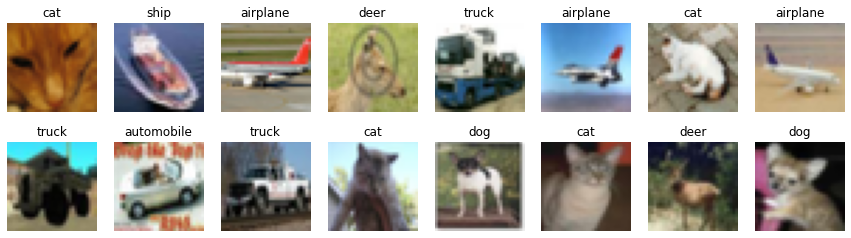

In [3]:
# show random images from train
cols = 8
rows = 2
fig = plt.figure(figsize=(2 * cols - 1, 2.5 * rows - 1))
for i in range(cols):
        for j in range(rows):
                random_index = np.random.randint(0, len(y_train))
                ax = fig.add_subplot(rows, cols, i * rows + j + 1)
                ax.grid('off')
                ax.axis('off')
                ax.imshow(x_train[random_index, :])
                ax.set_title(cifar10_classes[y_train[random_index, 0]])
plt.show()

In [4]:
%load_ext autoreload
%autoreload 2

In [38]:

from functools import partial
tfph = tf.compat.v1.placeholder
tf.compat.v1.disable_eager_execution()
from modeling import BaseConv, StridedConv, ResidualConv, Model, Attention
BC, SC, RC, AC = BaseConv, StridedConv, ResidualConv, Attention

layers = [BC(32), RC([16, 32]), RC([16, 32]), SC(64), RC([32, 64]), RC([32, 64]), SC(128), RC([64, 128]), RC([64, 128])] # .70
layers = [SC(8), RC([4, 8]), SC(16), RC([8, 16])]
layers = [SC(4), SC(4), AC(4), SC(8)]
layers = [BC(8), SC(16), BC(16), SC(32), AC(32), AC(32), SC(64), AC(64), AC(64)] # .70


batch_size = 4 # .71

In [46]:
mdl = Model(x_test_norm=x_test_norm,x_train_norm = x_train_norm,
            y_test_onehot=y_test_onehot,y_train_onehot = y_train_onehot,
           layers=layers, y_test = y_test)
mdl.train(batch_size = batch_size, steps = 2)

C:\workspace\Teaching\cifar_10\modeling_2.py:111: UserWarning: `tf.layers.conv2d` is deprecated and will be removed in a future version. Please Use `tf.keras.layers.Conv2D` instead.
  return self.layer(signal)
C:\workspace\Teaching\cifar_10\modeling_2.py:78: UserWarning: `tf.layers.conv2d` is deprecated and will be removed in a future version. Please Use `tf.keras.layers.Conv2D` instead.
  for _ in range(3)
C:\workspace\Teaching\cifar_10\modeling_2.py:155: UserWarning: `tf.layers.flatten` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Flatten` instead.
  pivot_feautres = tf.compat.v1.layers.flatten(pivot_feautres)
C:\workspace\Teaching\cifar_10\modeling_2.py:156: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  extra_pred = tf.compat.v1.layers.dense(pivot_feautres, NUM_CLASSES)
C:\workspace\Teaching\cifar_10\modeling_2.py:160: UserWarning: `tf.layers.flatten` is deprec

3.1764348


In [48]:
mdl.layers[-1].output

<tf.Tensor 'layer_normalization_49/batchnorm/add_1:0' shape=(None, 4, 4, 64) dtype=float32>

In [31]:
np.mean(mdl.losses[-10:]), np.min(mdl.val_losses)

(1.8848928, 1.70121)

In [32]:
# (0.068675384, 0.9072602)

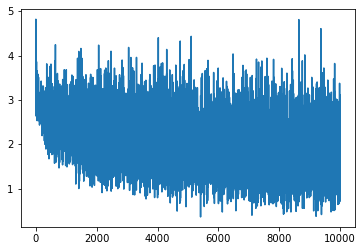

In [33]:
plt.plot(mdl.losses)

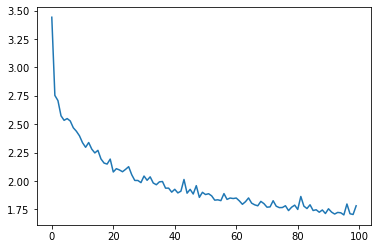

In [34]:
plt.plot(mdl.val_losses)

In [35]:

mdl.val_acc

[0.0982,
 0.1245,
 0.1409,
 0.1893,
 0.22,
 0.2015,
 0.2049,
 0.2208,
 0.2488,
 0.2528,
 0.2772,
 0.2955,
 0.2653,
 0.2997,
 0.3272,
 0.3119,
 0.3269,
 0.3429,
 0.3525,
 0.3432,
 0.3755,
 0.3572,
 0.3581,
 0.3684,
 0.3594,
 0.3615,
 0.3869,
 0.3902,
 0.3982,
 0.3982,
 0.3855,
 0.3975,
 0.381,
 0.4013,
 0.405,
 0.399,
 0.3963,
 0.4176,
 0.4141,
 0.4249,
 0.4249,
 0.4259,
 0.4206,
 0.3964,
 0.4301,
 0.4191,
 0.4313,
 0.4133,
 0.4476,
 0.4183,
 0.4273,
 0.4233,
 0.4351,
 0.4511,
 0.448,
 0.4535,
 0.4375,
 0.4534,
 0.4401,
 0.4466,
 0.4376,
 0.4483,
 0.4646,
 0.4601,
 0.4454,
 0.4487,
 0.4609,
 0.4649,
 0.4534,
 0.4645,
 0.4668,
 0.4667,
 0.4536,
 0.4732,
 0.47,
 0.468,
 0.4721,
 0.4835,
 0.4782,
 0.4648,
 0.4759,
 0.4349,
 0.4603,
 0.4714,
 0.4609,
 0.4792,
 0.4775,
 0.4878,
 0.4799,
 0.4842,
 0.4724,
 0.4806,
 0.4949,
 0.4846,
 0.483,
 0.4977,
 0.4646,
 0.4837,
 0.4931,
 0.4677]

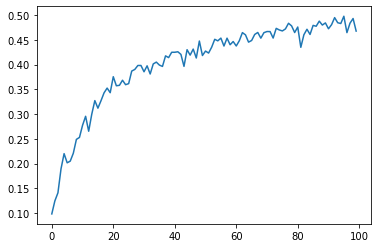

In [36]:
plt.plot(mdl.val_acc)

In [37]:
# validate model